# Comparison to Baseline Models
We are interested in comparing the performance of our CNN to some standard classifiers: a support vector machine (SVM) and a Naive Bayes Classifier.
## SVM
__Decision Function and Predictions:__

The linear SVM classifier predicts the class of a new instance $\mathbf{x}$ by computing the decision function $\mathbf{w}^{T}\mathbf{x} +b = w_1x_1 + w_2x_2 + ... +w_nx_n + b$. If the result is positive, $\hat{y}$ is the positive class (1) or it is the negative class (0).

$\hat{y} = 0$ if $\mathbf{w}^T\mathbf{x} + b < 0$

$\hat{y} = 1$ if $\mathbf{w}^T\mathbf{x} + b \geq 0$

The decision boundary is a set of points where the decision function is equal to 0: the intersection of two planes. Training a linear SVM classifier means finding the values of $\mathbf{w}$ and $b$ s.t.  the margin is as wide as possible while avoiding margin violations.

__Training objective:__

The smaller the weight vector $\mathbf{w}$ the larger the margin, and vice versa. So we want to minimize $||\mathbf{w}||$ to get a large margin. However, if we also want to avoid margin violations, then we need the decision function to be greater than 1 for all positive training instances and lower than -1 for the negative training instances. We define $t^{(i)} = 1$ for the positive training instances and $t^{(i)} = -1$ for the negative instances. Thus, the constraint can be expressed as:

$t^{(i)}(\mathbf{w}^T\mathbf{x} +b) \geq 1$. 

Thus, the *Hard margin linear SVM classifier objective* is:

${min}_{\mathbf{w}, b}$ $\frac{1}{2}\mathbf{w}^T\mathbf{w}$

${s.t.} \ t^{(i)}(\mathbf{w}^T\mathbf{x} +b) \geq 1$ for $i = 1, 2, ..., m$

The *soft margin objective* requires a slack variable $\xi^{(i)} \geq 0$ for each instance which measures how much the ith instance is allowed to violate the margin. We have two conflicting objectives: trying to make the slack variables as small as possible to reduce the margin violations and making $\frac{1}{2}\mathbf{w}^T\mathbf{w}$ as small as possible to increase the margin. $C$ allows us to define the trade-off between the two objectives, giving us the constrained optimization problem:

${min}_{\mathbf{w}, b}$ $\frac{1}{2}\mathbf{w}^T\mathbf{w} + C \sum_{i=1}^{m} \xi^{(i)}$

${s.t.} \ t^{(i)}(\mathbf{w}^T\mathbf{x} +b) \geq 1 - \xi^{(i)}$ for $i = 1, 2, ..., m$

$\xi^{(i)} \geq 0$ for $i= 1, 2, ..., m$.

These are both convex quadratic optimization problems with linear constraints. A general quadratic opimization problem looks like:

$min$ $\frac{1}{2}\mathbf{p}^T\mathbf{H}\mathbf{p} + \mathbf{f}^T\mathbf{p}$

${s.t.} \ \mathbf{A}\mathbf{p} \leq \mathbf{b}$

where $\mathbf{A}\mathbf{p} \leq \mathbf{b}$ defines the $n_c$ constraints: $\mathbf{p}^T\mathbf{a}^{(i)} \leq b^{(i)}$ for $i = 1, 2, ..., n_c$. $n_c$ is the number of training instances, $\mathbf{H}$ is an identity matrix with a zaero in the upper left corner, $\mathbf{f} = \mathbf{0}$, $\mathbf{b} = \mathbf{-1}$, and $\mathbf{a}^{(i)} = -t^{(i)}\dot{\mathbf{x}}^{(i)}$ is an extra bias feature $\dot{\mathbf{x}_{0}} = 1$.

__Dual:__

This problem has a primal and a dual optimization problem. We find the optimal solution to the primal problem by minimizing the dual. This has solution:

$\hat{\mathbf{w}} = \sum_{i=1}^{m}\hat{\alpha}^{(i)}t^{(i)}\mathbf{x}^{(i)}$ and

$\hat{b} = \frac{1}{n_s} \sum_{i=1}^{m} (t^{(i)} - \hat{\mathbf{w}}^T\mathbf{x}^{(i)})$, with $\alpha^{(i)}  > 0$.

__Kernelized SVM:__

We can apply the transformation: $\phi(\mathbf{x})$, this can be done with with two two-dimensional vectors as well $\phi(\mathbf{a})^T\phi(\mathbf{b}) = (\mathbf{a}^T\mathbf{b}$. We can do this sort of trick with different kernels with the function: $K(\mathbf{a}, \mathbf{b})$:

Linear: $K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T\mathbf{b}$

Polynomial: $K(\mathbf{a}, \mathbf{b}) = (\gamma \mathbf{a}^T\mathbf{b} + r)^d$

Gaussian RBF: $K(\mathbf{a}, \mathbf{b}) = exp(-\gamma ||\mathbf{a} - \mathbf{b}||^2)$

Sigmoid: $K(\mathbf{a}, \mathbf{b}) = tanh(\gamma\mathbf{a}^T\mathbf{b} + r)$

*Look at Mercer's Thm. on page 165, Hands-On Machine Learning with Scikit-Learn and Tensorflow by Geron (2017)*

We can make predictions using the kernelized SVM that includes $\phi(x^{(i)})$ and $\hat{\mathbf{w}}$ must have the same number of dimensions. We can use dual solution to the primal to get the solution:

$h_{\hat{\mathbf{w}}, \hat{b}}(\phi(\mathbf{x}^{(n)})) = \hat{\mathbf{w}}^T\phi(\mathbf{x^{(n)}}) + \hat{b} = ... = \sum_{i = 1}^{m} \hat{\alpha^{(i)}} t^{(i)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(n)}) + \hat{b}$ with $\hat{\alpha}^{(i)}>0$.

We have a bias term calculated as:

$\hat{b} = \frac{1}{n_s}\sum_{i=1}^m (t^{(i)} - \sum_{i=1}^m \hat{\alpha^{(i)}} t^{(i)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(n)}))$.

__Hinge loss:__

The function $max(0, 1- t)$  is called the *hinge loss* function. It is equal to zero when $t \geq 1$. Its derivative is equal to -1 if $t<1$ and 0 is $t>1$, and is not differentiable at $t=1$.

We will use a Linear SVC model here, since we have a simple binary decision function.

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import glob
import nltk
import string
import pandas as pd
from sklearn.model_selection import cross_val_score
import seaborn as sns

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Create the dictionary
# zeros, ones, twos, threes hdf5 files
zeros = pd.read_hdf('datasets/zeros.h5', 'zeros')
zeros['relevance_class'] = np.zeros(len(zeros)).astype(int)
ones = pd.read_hdf('datasets/ones.h5', 'ones')
ones['relevance_class'] = np.ones(len(ones)).astype(int)
twos = pd.read_hdf('datasets/twos.h5', 'twos')
twos['relevance_class'] = 2 * np.ones(len(twos)).astype(int)
threes = pd.read_hdf('datasets/threes.h5', 'threes')
threes['relevance_class'] = 3 * np.ones(len(threes)).astype(int)
# concatenating all rated tweets
all_tweets = pd.concat([zeros, ones, twos, threes]).reset_index()
all_tweets = all_tweets.iloc[:, 1:]
all_tweets.head()

,text,cleaned_text,relevance_class
0,*@AssombalongaSZN *@TrollFootball Get it cause...,get it cause his name is wait for it drinkwate...,0
1,"*@femdelsin Ember blinked ""Well...im stuck her...",ember blinked wellim stuck here she sighs usin...,0
2,We take lead out of gas before we put it into ...,we take lead out of gas before we put it into ...,0
3,*@CravableKen I just be drinking water &amp m...,i just be drinking water amp minding my business,0
4,*@krebiozen *@igitwp *@Luma923 *@NotOfIt7k *@K...,you can lead a horse to water,0


In [7]:
# Text cleaner found on github: https://github.com/martinpella/twitter-airlines/blob/master/utils.py
from sklearn.base import BaseEstimator, TransformerMixin
import re

class TextCleaner(BaseEstimator, TransformerMixin):    
    def remove_mentions(self, text):        
        return re.sub(r'@\w+', '', text)
    
    def remove_urls(self, text):        
        return re.sub(r'http.?://[^\s]+[\s]?', '', text)
    
    def only_characters(self, text):
        return re.sub('[^a-zA-Z\s]', '', text)
    
    def remove_extra_spaces(self, text):
        text = re.sub("\s+", ' ', text)
        text = text.lstrip()
        return text.rstrip()
    
    def to_lower(self, text):
        return text.lower()
    
    def fix_words(self, text):
        text = re.sub(r'\bthx\b', 'thanks', text)
        text = re.sub(r'\bu\b', 'you', text)
        text = re.sub(r'\bhrs\b', 'hours', text)
        text = re.sub(r'\baa\b', 'a', text)
        text = re.sub(r'\bflightr\b', 'flight', text)
        text = re.sub(r'\bur\b', 'your', text)
        text = re.sub(r'\bhr\b', 'hour', text)
        text = re.sub(r'\bthru\b', 'through', text)
        text = re.sub(r'\br\b', 'are', text)
        text = re.sub(r'\bppl\b', 'people', text)
        text = re.sub(r'\btix\b', 'fix', text)
        text = re.sub(r'\bplz\b', 'please', text)
        text = re.sub(r'\bflightd\b', 'flighted', text)
        text = re.sub(r'\btmrw\b', 'tomorrow', text)
        text = re.sub(r'\bthx\b', 'thanks', text)
        text = re.sub(r'\bpls\b', 'please', text)
        text = re.sub(r'\bfyi\b', 'for your information', text)
        
        text = re.sub(r'\bheyyyy\b', 'hey', text)
        text = re.sub(r'\bguyyyys\b', 'guys', text)
        text = re.sub(r'\byall\b', 'you all', text)
        text = re.sub(r'\basap\b', 'as soon as possible', text)
        text = re.sub(r'\bbtw\b', 'by the way', text)
        text = re.sub(r'\bdm\b', 'direct message', text)
        text = re.sub(r'\bcudtomers\b', 'customers', text)
        text = re.sub(r'\bwtf\b', 'what the fuck', text)
        text = re.sub(r'\biphone\b', 'phone', text)
        text = re.sub(r'\bmins\b', 'minutes', text)
        text = re.sub(r'\btv\b', 'television', text)
        text = re.sub(r'\bokay\b', 'ok', text)
        text = re.sub(r'\bfeb\b', 'february', text)
        text = re.sub(r'\byr\b', 'year', text)
        text = re.sub(r'\bshes\b', 'she is', text)
        text = re.sub(r'\bnope\b', 'no', text)
        text = re.sub(r'\bhes\b', 'he is', text)
        text = re.sub(r'\btill\b', 'until', text)
        text = re.sub(r'\bomg\b', 'oh my god', text)
        text = re.sub(r'\btho\b', 'though', text)
        text = re.sub(r'\bnothappy\b', 'not happy', text)
        return re.sub(r'\bthankyou\b', 'thank you', text)
        
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):        
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.only_characters).apply(self.remove_extra_spaces).apply(self.to_lower).apply(self.fix_words)
        return clean_X

In [8]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): 
    return re_tok.sub(r' \1 ', s).split()

all_tweets['tokenized'] = all_tweets['cleaned_text'].apply(lambda row: tokenize(row))
all_tweets.head()

,text,cleaned_text,relevance_class,tokenized
0,*@AssombalongaSZN *@TrollFootball Get it cause...,get it cause his name is wait for it drinkwate...,0,"[get, it, cause, his, name, is, wait, for, it,..."
1,"*@femdelsin Ember blinked ""Well...im stuck her...",ember blinked wellim stuck here she sighs usin...,0,"[ember, blinked, wellim, stuck, here, she, sig..."
2,We take lead out of gas before we put it into ...,we take lead out of gas before we put it into ...,0,"[we, take, lead, out, of, gas, before, we, put..."
3,*@CravableKen I just be drinking water &amp m...,i just be drinking water amp minding my business,0,"[i, just, be, drinking, water, amp, minding, m..."
4,*@krebiozen *@igitwp *@Luma923 *@NotOfIt7k *@K...,you can lead a horse to water,0,"[you, can, lead, a, horse, to, water]"


In [9]:
all_tweets = all_tweets.drop_duplicates(subset = ['cleaned_text']).reset_index()
all_tweets = all_tweets.iloc[:, 1:]
print(len(all_tweets))
all_tweets.head()

76148


,text,cleaned_text,relevance_class,tokenized
0,*@AssombalongaSZN *@TrollFootball Get it cause...,get it cause his name is wait for it drinkwate...,0,"[get, it, cause, his, name, is, wait, for, it,..."
1,"*@femdelsin Ember blinked ""Well...im stuck her...",ember blinked wellim stuck here she sighs usin...,0,"[ember, blinked, wellim, stuck, here, she, sig..."
2,We take lead out of gas before we put it into ...,we take lead out of gas before we put it into ...,0,"[we, take, lead, out, of, gas, before, we, put..."
3,*@CravableKen I just be drinking water &amp m...,i just be drinking water amp minding my business,0,"[i, just, be, drinking, water, amp, minding, m..."
4,*@krebiozen *@igitwp *@Luma923 *@NotOfIt7k *@K...,you can lead a horse to water,0,"[you, can, lead, a, horse, to, water]"


In [10]:
from nltk.corpus import stopwords

import collections
stop = set(stopwords.words('english'))
stop.update(['amp', 'rt', 'cc'])
stop = stop - set(['no', 'not'])

def remove_stopwords(row):
    return [t for t in row if t not in stop]

all_tweets['tokenized'] = all_tweets['tokenized'].apply(lambda row: remove_stopwords(row))

all_tweets = all_tweets[['cleaned_text', 'relevance_class', 'tokenized']]
vocab_counter = collections.Counter()

In [13]:
tokens = np.array(all_tweets['tokenized']).reshape(-1, 1)
words = []
for i in range(len(tokens)):
    tweet = tokens[i]
    for j in range(len(tweet)):
        new_word = tweet[j]
        words.append(new_word)

print(type(words))
indivs = []
for tweet in range(len(words)):
    t = words[tweet]
    for j in range(len(t)):
        indivs.append(t[j])

vocabulary_size = 25000
from collections import Counter

# UNK = unknown words, HST = hashtag, EMT = emoticon, URL is self-explanatory, THDL = Twitter handle
vocabulary = [("<UNK>", None)] + Counter(indivs).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in indivs])
print(len(vocabulary))
#print(len(data))

<class 'list'>
25000


Many words are not important in the analysis of text. A `TfidfTransformer()` reweights the words/tokens in the vectorized tweets. "Tf" means term-frequency and "idf" means inverse document frequency.

${tfidf}(t,d) = {tf}(t,d) * {idf}(t)$

The term frequency, the number of times a term occurs in a given document, is multiplied with idf component, which is computed as:

${idf}(t) = log \frac{1+n}{1+{df}(t)} + 1$

where where $n$ is the total number of documents in the document set, and $df(t)$ is the number of documents in the document set that contain term. The resulting tf-idf vectors are then normalized by the Euclidean norm:

$v_{norm} = \frac{\mathbf{v}}{{||\mathbf{v}||}_2}$

We did use Tf-Idf correction for smoothing, which adds “1” to the numerator and denominator as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions:

In [14]:
# Ordinal vectorization of classes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
ordinal_encoder = OrdinalEncoder()

y = ordinal_encoder.fit_transform(np.array(all_tweets['relevance_class']).ravel().reshape(-1, 1))
y = np.array(y)
print(y[:5])
print(ordinal_encoder.categories_)
cat_labels = ordinal_encoder.categories_

# If we get labeled data, we would use train_test_split to test out our model
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_tweets['cleaned_text'].values, y, test_size = 0.20,
                                                    random_state = 42, stratify = y)

# We use the vocabulary formulation from the embedding formed from the autoenconder_for_tweets.ipynb
vectorizer = TfidfVectorizer(strip_accents = 'unicode', stop_words = 'english', vocabulary = vocabulary)

# tf-idf vectorization of the training set
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.fit_transform(X_test)
#print(vectorizer.get_feature_names())
print(X_train_tfidf.shape, X_test_tfidf.shape)
#print(type(X_tfidf))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array([0, 1, 2, 3])]
(60918, 25000) (15230, 25000)


In [15]:
# SVM models
from sklearn.model_selection import GridSearchCV
param_distribs = {'C': [0.1, 1, 10, 20, 30, 40, 50, 100, 1000]}

svc_clf = LinearSVC(random_state = 42, max_iter = 20000, tol = 1e-5)
grid_search = GridSearchCV(svc_clf, param_grid=param_distribs,
                                cv=5, scoring=None, return_train_score = True)
grid_search.fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=20000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=1e-05, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 20, 30, 40, 50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [16]:
print(grid_search.best_estimator_,
     grid_search.best_params_)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=20000,
          multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
          verbose=0) {'C': 0.1}


In [17]:
from sklearn.metrics import accuracy_score
# best params
bsvc_clf = LinearSVC(C = 0.1, random_state = 42, max_iter = 20000, tol = 1e-5)
bsvc_clf.fit(X_train_tfidf, y_train)
y_pred_svc = bsvc_clf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred_svc)

0.8856204858831254

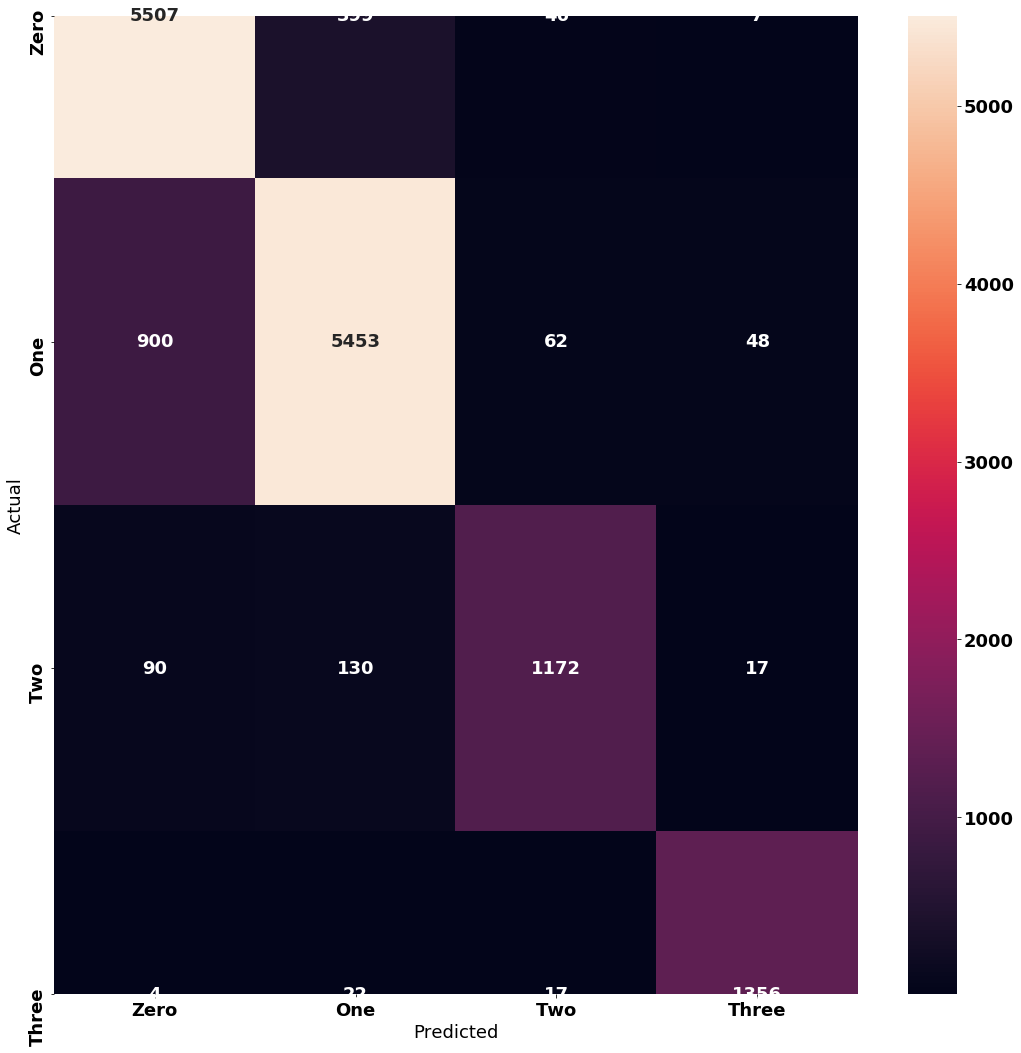

In [27]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Zero', 'One', 'Two', 'Three'], yticklabels=['Zero', 'One', 'Two', 'Three'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
font = {'family' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
#plt.savefig('svc_confusion.png')
plt.show()

In [63]:
# Playing with the predictor
my_tweet_rel = "Algal bloom closes 31st Street Beach in Chicago"
my_not_rel_tweet = "Hot singles in your area near you"
neutral = "I drank water today."
political = "These darn Dems want to regulate everything and put chemicals in the water to turn the frogs gay"
drought = "Crops dying in Midwest as drought reaches record 3 months"
chemical = "Mercury levels in the Milwaukee River reach an all time high as spill releases thousands of gallons of waste water"
bot = 'You will be addicted to my story after seeing it :water_drops:'
wet = 'It sure is wet outside today &%$(@)[]//////1#3849'
two = 'Massive flooding in the Flemish region recently. When will we wake up at solve global warming?'
one = 'I drank the water from the Ganges River today and it was not great.'

tweet_list = {'tweet': [my_tweet_rel, my_not_rel_tweet, neutral, drought, chemical, political,
                        bot, wet, two, one]}
tweets = pd.DataFrame(data = tweet_list)

In [64]:
tc = TextCleaner()

tweets['clean'] = tc.transform(tweets['tweet'])
tweets

,tweet,clean
0,Algal bloom closes 31st Street Beach in Chicago,algal bloom closes st street beach in chicago
1,Hot singles in your area near you,hot singles in your area near you
2,I drank water today.,i drank water today
3,Crops dying in Midwest as drought reaches reco...,crops dying in midwest as drought reaches reco...
4,Mercury levels in the Milwaukee River reach an...,mercury levels in the milwaukee river reach an...
5,These darn Dems want to regulate everything an...,these darn dems want to regulate everything an...
6,You will be addicted to my story after seeing ...,you will be addicted to my story after seeing ...
7,It sure is wet outside today &%$(@)[]//////1#3849,it sure is wet outside today
8,Massive flooding in the Flemish region recentl...,massive flooding in the flemish region recentl...
9,I drank the water from the Ganges River today ...,i drank the water from the ganges river today ...


In [65]:
tweets_tfidf = vectorizer.fit_transform(tweets['clean'].values)
predictions = bsvc_clf.predict(tweets_tfidf)
tweets['svc_predictions'] = predictions
tweets

,tweet,clean,svc_predictions
0,Algal bloom closes 31st Street Beach in Chicago,algal bloom closes st street beach in chicago,3.0
1,Hot singles in your area near you,hot singles in your area near you,0.0
2,I drank water today.,i drank water today,1.0
3,Crops dying in Midwest as drought reaches reco...,crops dying in midwest as drought reaches reco...,1.0
4,Mercury levels in the Milwaukee River reach an...,mercury levels in the milwaukee river reach an...,2.0
5,These darn Dems want to regulate everything an...,these darn dems want to regulate everything an...,1.0
6,You will be addicted to my story after seeing ...,you will be addicted to my story after seeing ...,0.0
7,It sure is wet outside today &%$(@)[]//////1#3849,it sure is wet outside today,0.0
8,Massive flooding in the Flemish region recentl...,massive flooding in the flemish region recentl...,1.0
9,I drank the water from the Ganges River today ...,i drank the water from the ganges river today ...,1.0


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc, target_names=['Zeros', 'Ones', 'Twos', 'Threes']))

              precision    recall  f1-score   support

       Zeros       0.85      0.92      0.88      5959
        Ones       0.91      0.84      0.87      6463
        Twos       0.90      0.83      0.87      1409
      Threes       0.95      0.97      0.96      1399

    accuracy                           0.89     15230
   macro avg       0.90      0.89      0.90     15230
weighted avg       0.89      0.89      0.89     15230



## Multinomial Naive Bayes Classifier
One of the text classification model will rely on a as a baseline comparison is a Naive Bayesian classifier. The tweets can be assigned a label from a finite set based on the characteristics of the tweet. The key is that the classifier will assume independence of the characteristics of the tweet, independence of the words used to construct the tweets, that would be used to determine the probability that the tweet should be assigned one of the classes.

Mathematically, the probability that a tweet would belong to a certain class, like ''fire'', is conditional. If we assume the features of the tweet are independent, have a tweet with $n$ features that are relevant to the classification of the tweet, this can be stored as a vector, $x = (x_1, x_2, ..., x_n)$. Say that there are $k$ different classes, $\{C_1, C_2, ..., C_k\}$, which the tweet could potentially be associated with. Based on the features of the tweet, we can assign a conditional probability to which class the tweet could belong to for any class $C_i, i \in \{1, 2, ... k\}$:
$\begin{equation}
    P(C_i | x_1, x_2, ..., x_n)
\end{equation}$

The obvious problem with this line of thinking is that the potential number of features for a tweet can be relatively large. Using Bayes' Theorem, the probability a tweet being associated with class $C_i$, would be:

$\begin{equation}
    P(C_i | x) = \frac{p(C_i)p(x|C_i)}{p(x)}
\end{equation}$

In other words, the probability that a tweet belongs to class $i$ is equal to the prior likelihood that a tweet belonged to class $i$ times the likelihood probability that this tweet belongs to class $i$, divided by the likelihood that the specific tweet exists in that order. Note that the numerator is really the only thing of interest here, as it is dependent on class $k$. Using the laws of conditional probability, we can rewrite the joint probability of the model:

$\begin{equation}
    P(C_i, x_1, ..., x_n) = P(x_1|x_2, ...,x_n, C_k) P(x_2,...,x_n, C_k)
\end{equation}$
$\begin{equation}
    =P(x_1|x_2, ..., x_n, C_k)P(x_2|x_3, ..., x_n, C_k)P(x_3, ..., x_n, C_k)=...
\end{equation}$
$\begin{equation}
    =P(x_1|x_2,..., x_n, C_k)P(x_2|x_3,..., x_n, C_k) ...P(x_n|C_k)P(C_k)
\end{equation}$

Yet, naive conditional independence implies that for any feature $x_j$ is conditionally independent of $x_l$, for any $j \neq l$, which translates to:

$\begin{equation}
    P(x_j| x_{j+1}, ..., x_n, C_k) = P(x_j|C_k)
\end{equation}$

This changes the conditional probability to:

$\begin{equation}
    P(C_k|x_1, ..., x_n) \propto P(C_k, x_1, ..., x_n)
\end{equation}$
$\begin{equation}
    =P(C_k) \prod_{i=1}^{n} P(x_i|C_k)
\end{equation}$

Using the independence assumptions, the probability of observing class $C_k$, given features $\{x_1, ..., x_n\}$ is:
$\begin{equation}
    \frac{P(C_k) \prod_{i=1}^{n} P(x_i|C_k)}{P(x_1, ..., x_n)}
\end{equation}$
$\begin{equation}
    =\frac{P(C_k) \prod_{i=1}^{n} P(x_i|C_k)}{\sum_{k}P(C_k)P(x_1, x_2,..., x_n|C_k)}
\end{equation}$

This is how probabilities are solved for using any distribution to determine $P(C_k|x_1, ..., x_n)$. We are using the multinomial distribution to determine the class probabilities. This means that $P(x_1, ..., x_n|C_k)$ is written as:

$\begin{equation}
    P(x_1, ..., x_n|C_k) = \frac{(\sum_i x_i)!}{\prod_i x_i!}\prod_i p_{ki}^{x_i}
\end{equation}$

where $p_{ki}$ is the probability of class $k$ associated with observation $i$.

In [28]:
from sklearn.naive_bayes import MultinomialNB
param_distribs = {
        'alpha': np.linspace(1, 50, num = 50).astype(int),
    }
mnb_clf = MultinomialNB()
grid_search = GridSearchCV(mnb_clf, param_grid=param_distribs,
                           cv=5, scoring=None)
grid_search.fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print(grid_search.best_estimator_,
     grid_search.best_params_)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True) {'alpha': 3}


In [30]:
bmnb_clf = MultinomialNB(alpha = 3)
bmnb_clf.fit(X_train_tfidf, y_train)
y_pred_nb = bmnb_clf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred_nb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7533158240315168

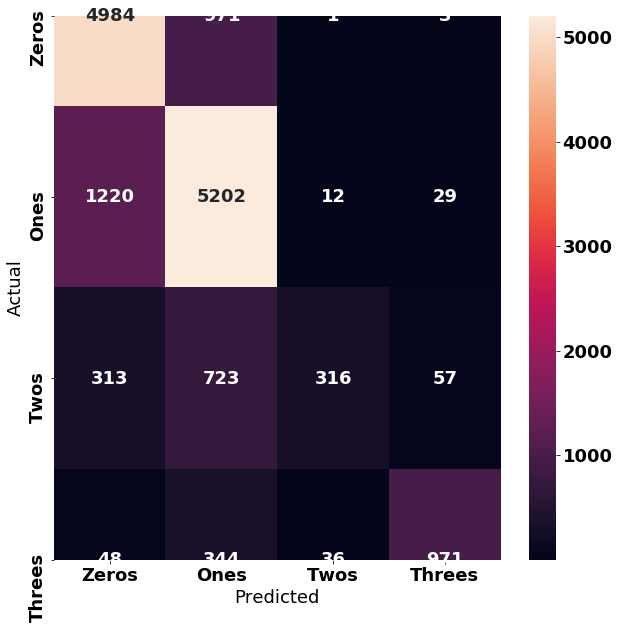

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Zeros', 'Ones', 'Twos', 'Threes'], 
            yticklabels=['Zeros', 'Ones', 'Twos', 'Threes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb, target_names=['Zeros', 'Ones', 'Twos', 'Threes']))

              precision    recall  f1-score   support

       Zeros       0.76      0.84      0.80      5959
        Ones       0.72      0.80      0.76      6463
        Twos       0.87      0.22      0.36      1409
      Threes       0.92      0.69      0.79      1399

    accuracy                           0.75     15230
   macro avg       0.81      0.64      0.68     15230
weighted avg       0.77      0.75      0.74     15230



In [66]:
predictions = bmnb_clf.predict(tweets_tfidf)
tweets['mnb_predictions'] = predictions
tweets

,tweet,clean,svc_predictions,mnb_predictions
0,Algal bloom closes 31st Street Beach in Chicago,algal bloom closes st street beach in chicago,3.0,3.0
1,Hot singles in your area near you,hot singles in your area near you,0.0,0.0
2,I drank water today.,i drank water today,1.0,0.0
3,Crops dying in Midwest as drought reaches reco...,crops dying in midwest as drought reaches reco...,1.0,1.0
4,Mercury levels in the Milwaukee River reach an...,mercury levels in the milwaukee river reach an...,2.0,0.0
5,These darn Dems want to regulate everything an...,these darn dems want to regulate everything an...,1.0,0.0
6,You will be addicted to my story after seeing ...,you will be addicted to my story after seeing ...,0.0,0.0
7,It sure is wet outside today &%$(@)[]//////1#3849,it sure is wet outside today,0.0,0.0
8,Massive flooding in the Flemish region recentl...,massive flooding in the flemish region recentl...,1.0,1.0
9,I drank the water from the Ganges River today ...,i drank the water from the ganges river today ...,1.0,0.0


## Logistic Regression
Estimating the probability of an event occurring:

$\hat{p} = \sigma(X\beta)$, where $\sigma(.)$ is a sigmoid function that outputs a number between zero and one.

The logistic function is:

$\sigma(X\beta) = \frac{1}{1 + exp(X\beta)}$.

Prediction rules can be determined in many ways, but generally, if $\hat{p} < x$ then $\hat{y}=0$ and if $\hat{p} \geq x$ then $\hat{y} = 1$.

Since the model estimates probabillities and makes predictions, we train the model by setting the parameter vector $\beta$ so that we have high probabilities for positives and low probabilities for negatives. The cost function for training $m$ instances is:

$LGC(\beta) = -\frac{1}{m}\sum_{i=1}^{m} [y_i ln(\hat{p_i} + (1 - y_i) ln(1 - \hat{p_i})]$

There is no closed form solution that minimizes the cost function. Since the cost function is convex, so gradient descent is guaranteed to find the global minimum. The partial derivatives with respect to the jth model parameter is:

$\frac{\partial}{\partial \beta_j} LGC(\beta) = \frac{1}{m} \sum_{i=1}^{m}(\sigma(X_i\beta - y_i)x_{ij}$

In [33]:
from sklearn.linear_model import LogisticRegression

param_distribs = {
        'C': [0.1, 0.5, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'penalty': ['l1', 'l2']
    }

# Could potentially change penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

log_clf = LogisticRegression(random_state=42, max_iter = 1000)
grid_search = GridSearchCV(log_clf, param_grid=param_distribs,
                           cv=5, scoring=None)
grid_search.fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                               100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
print(grid_search.best_estimator_,
      grid_search.best_params_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) {'C': 1, 'penalty': 'l1'}


In [35]:
blog_clf = LogisticRegression(C = 1, penalty = 'l1', random_state = 42, max_iter = 1000)
blog_clf.fit(X_train_tfidf, y_train)
y_pred_log = blog_clf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred_log)

0.8920551543007222

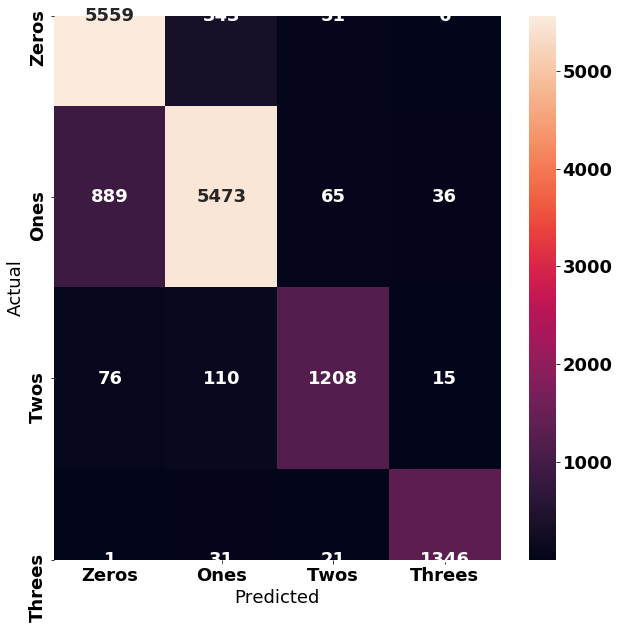

In [36]:
conf_mat = confusion_matrix(y_test, y_pred_log)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Zeros', 'Ones', 'Twos', 'Threes'], 
            yticklabels=['Zeros', 'Ones', 'Twos', 'Threes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_log, target_names=['Zeros', 'Ones', 'Twos', 'Threes']))

              precision    recall  f1-score   support

       Zeros       0.85      0.93      0.89      5959
        Ones       0.92      0.85      0.88      6463
        Twos       0.90      0.86      0.88      1409
      Threes       0.96      0.96      0.96      1399

    accuracy                           0.89     15230
   macro avg       0.91      0.90      0.90     15230
weighted avg       0.89      0.89      0.89     15230



In [67]:
predictions = blog_clf.predict(tweets_tfidf)
tweets['logistic_predictions'] = predictions
tweets

,tweet,clean,svc_predictions,mnb_predictions,logistic_predictions
0,Algal bloom closes 31st Street Beach in Chicago,algal bloom closes st street beach in chicago,3.0,3.0,3.0
1,Hot singles in your area near you,hot singles in your area near you,0.0,0.0,0.0
2,I drank water today.,i drank water today,1.0,0.0,1.0
3,Crops dying in Midwest as drought reaches reco...,crops dying in midwest as drought reaches reco...,1.0,1.0,1.0
4,Mercury levels in the Milwaukee River reach an...,mercury levels in the milwaukee river reach an...,2.0,0.0,2.0
5,These darn Dems want to regulate everything an...,these darn dems want to regulate everything an...,1.0,0.0,1.0
6,You will be addicted to my story after seeing ...,you will be addicted to my story after seeing ...,0.0,0.0,0.0
7,It sure is wet outside today &%$(@)[]//////1#3849,it sure is wet outside today,0.0,0.0,0.0
8,Massive flooding in the Flemish region recentl...,massive flooding in the flemish region recentl...,1.0,1.0,1.0
9,I drank the water from the Ganges River today ...,i drank the water from the ganges river today ...,1.0,0.0,1.0


In [45]:
from sklearn.ensemble import VotingClassifier

bmnb_clf = MultinomialNB(alpha = 3)

voting_clf = VotingClassifier(
    estimators = [('lr', blog_clf), ('mnb', bmnb_clf), ('svc', bsvc_clf)],
    voting = 'hard',
    n_jobs = 1)

for clf in (blog_clf, bsvc_clf, bmnb_clf, voting_clf):
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression 0.8920551543007222
LinearSVC 0.8856204858831254
MultinomialNB 0.7533158240315168


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier 0.8871306631648063


In [46]:
y_pred = voting_clf.predict(X_test_tfidf)

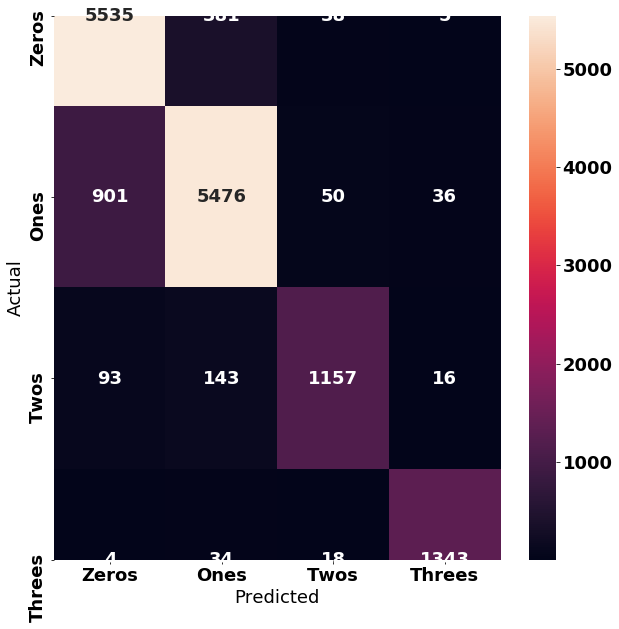

In [47]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Zeros', 'Ones', 'Twos', 'Threes'], 
            yticklabels=['Zeros', 'Ones', 'Twos', 'Threes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.show()

In [48]:
print(classification_report(y_test, y_pred, target_names=['Zeros', 'Ones', 'Twos', 'Threes']))

              precision    recall  f1-score   support

       Zeros       0.85      0.93      0.89      5959
        Ones       0.91      0.85      0.88      6463
        Twos       0.92      0.82      0.87      1409
      Threes       0.96      0.96      0.96      1399

    accuracy                           0.89     15230
   macro avg       0.91      0.89      0.90     15230
weighted avg       0.89      0.89      0.89     15230



In [68]:
predictions = voting_clf.predict(tweets_tfidf)
tweets['voting_predictions'] = predictions
tweets

,tweet,clean,svc_predictions,mnb_predictions,logistic_predictions,voting_predictions
0,Algal bloom closes 31st Street Beach in Chicago,algal bloom closes st street beach in chicago,3.0,3.0,3.0,3.0
1,Hot singles in your area near you,hot singles in your area near you,0.0,0.0,0.0,0.0
2,I drank water today.,i drank water today,1.0,0.0,1.0,1.0
3,Crops dying in Midwest as drought reaches reco...,crops dying in midwest as drought reaches reco...,1.0,1.0,1.0,1.0
4,Mercury levels in the Milwaukee River reach an...,mercury levels in the milwaukee river reach an...,2.0,0.0,2.0,2.0
5,These darn Dems want to regulate everything an...,these darn dems want to regulate everything an...,1.0,0.0,1.0,1.0
6,You will be addicted to my story after seeing ...,you will be addicted to my story after seeing ...,0.0,0.0,0.0,0.0
7,It sure is wet outside today &%$(@)[]//////1#3849,it sure is wet outside today,0.0,0.0,0.0,0.0
8,Massive flooding in the Flemish region recentl...,massive flooding in the flemish region recentl...,1.0,1.0,1.0,1.0
9,I drank the water from the Ganges River today ...,i drank the water from the ganges river today ...,1.0,0.0,1.0,1.0
